## Image Processing
Sometimes,	you	have	to	work	with	specific	channels	on	multichannel	images.	To do	this,	you	have	to	split	the	multichannel	image	into	several	single-channel images.	Additionally,	once	the	processing	has	been	done,	you	may	want	to create	one	multichannel	image	from	different	single-channel	images.	In	order	to both	split	and	merge	channels,	you	can	use	the	cv2.split()	and cv2.merge()	functions,	respectively.

The	cv2.split()	function	splits	the	source multichannel	image	into	several	single-channel	images.	The	cv2.merge()	function merges	several	single-channel	images	into	a	multichannel	image

Using	the	cv2.split()	function,	if	you	want to	get	the	three	channels	from	a	loaded	BGR	image,	then	you	should	use	the following	code:

Using	the	cv2.merge()	function,	if	you	want	to	build	the	BGR	image	again	from	its three	channels,	then	you	should	use	the	following	code
	

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
numpy_version = np.__version__
opencv_version = cv2.__version__
print("NUmpy version:{numpy}".format(numpy = numpy_version))
print("OpenCv version:{opencv}".format(opencv = opencv_version))



NUmpy version:1.16.2
OpenCv version:4.2.0


In [4]:
def displayImage(imageList):
    plt.figure(figsize=(30,20))
    i = 0
    for item in imageList:  
        plt.subplot(1, 5, i+1)
        plt.imshow(item['image'])
        i += 1
        plt.axis('off')
        plt.title(item['name'])
    plt.show()
#imageList = [{'name':'Original','image':image},{'name':'Gray Scale','image':gray},]

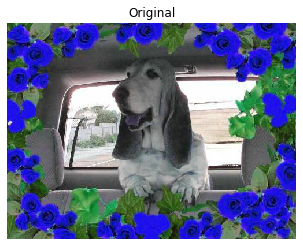

In [5]:
image = cv2.imread('images/dog5.jpg')

displayImage([{'name':'Original','image':image}])

In [6]:
## Split Image
(b, g, r) = cv2.split(image)

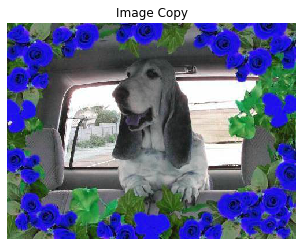

In [38]:
image_copy = cv2.merge((b,g,r))

displayImage([{'name':'Image Copy','image':image_copy}])

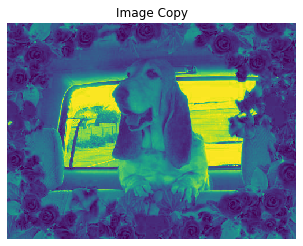

In [57]:
image_without_blue = image[:,:,0]


displayImage([{'name':'Image Copy','image':image_withou}])

In [58]:
image_without_blue.shape

(374, 500)

## Scaling an Image
When	scaling	an	image,	you	can	call	cv2.resize()	with	a	specific	size,	and	the scaling	factors	(fx	and	fy)	will	be	calculated	based	on	the	provided	size

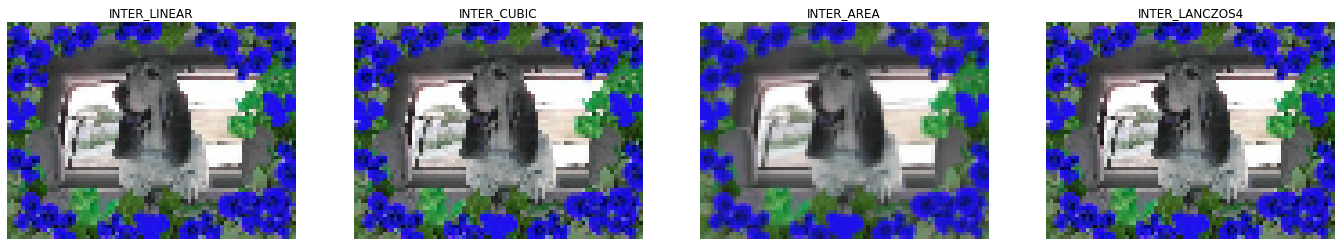

In [80]:
resized_image1 = cv2.resize(image, (80,60),interpolation = cv2.INTER_LINEAR)
resized_image2 = cv2.resize(image, (80,60),interpolation = cv2.INTER_CUBIC)
resized_image3 = cv2.resize(image, (80,60),interpolation = cv2.INTER_AREA)
resized_image4 = cv2.resize(image, (80,60),interpolation = cv2.INTER_LANCZOS4)

images = [
    {'name':'INTER_LINEAR','image':resized_image1},
    {'name':'INTER_CUBIC','image':resized_image2},
    {'name':'INTER_AREA','image':resized_image3},
    {'name':'INTER_LANCZOS4','image':resized_image4},
]
displayImage(images)

In [70]:
image.shape

(374, 500, 3)

## Rotating Image

In	order	to	rotate	the	image,	we	make	use	of	the	cv.getRotationMatrix2D()	function to	build	the	2	x	3	transformation	matrix.	This	matrix	rotates	the	image	at	the desired	angle	(in	degrees),	where	positive	values	indicate	a	counterclockwise rotation.	Both	the	center	of	rotation	and	the	scale	factor	can	also	be	adjusted. 

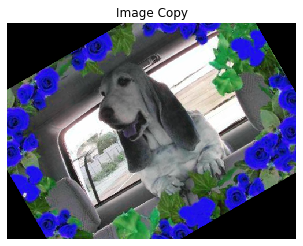

In [101]:
h,w = image.shape[:2]
M = cv2.getRotationMatrix2D((w/2.0, h/2.0),30, 1)
desImage = cv2.warpAffine(image, M, (w, h))
displayImage([{'name':'Image Copy','image':desImage}])

## Affine	transformation	of	an	image


An	affine	transformation	is	a	transformation	where	points,	straight	lines,	and	planes	are preserved.	Additionally,	the	parallel	lines	will	remain	parallel	after	this	transformation. However,	an	affine	transformation	does	not	preserve	both	the	distance	and	angles	between points

In	an	affine	transformation,	we	first	make	use	of the	cv2.getAffineTransform()	function	to	build	the	2	x	3	transformation	matrix, which	will	be	obtained	from	the	input	image	and	the	corresponding	coordinates in	the	transformed	image.	Finally,	this	M	matrix	is	passed	to	cv2.warpAffine(),	as follows


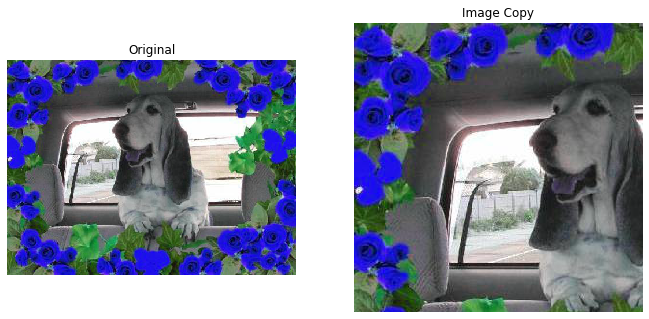

In [109]:
pts1 = np.float32([[135,45],[385,45],[135,230]])
pts2 = np.float32([[135,45],[385,45],[135,230]])

M = cv2.getAffineTransform(pts1, pts2)
dst_image = cv2.warpAffine(image, M, (300,300))

displayImage([{'name':'Original','image':image},{'name':'Image Copy','image':dst_image}])